<a href="https://colab.research.google.com/github/satichandrala/MasterProject/blob/main/ANN_Master_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [2]:
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [8]:
test = pd.read_excel('LRData.xlsx', header=0)
X = test.iloc[:, :-1].values
y = test.iloc[:, -1].values

In [10]:
test.head()

,Area Type,id.1,CCTT_min,CCD_km,TF,TTSC_min,MR_dKm,KG_Si,Pop_Ha,GS_dkm,WBdkm,Prices
0,MD,744,40.036887,38.160618,3,11.284460,4.675,1,218,0.145,0.150,115
1,MD,736,38.158431,36.488280,2,11.670782,0.415,0,305,0.090,0.249,120
2,MD,1606,38.981977,39.886531,3,5.828134,8.973,1,991,0.146,0.298,140
3,MD,1460,35.231935,34.325897,2,5.836629,3.647,0,402,0.121,0.111,145
4,MD,1506,39.426625,40.337254,3,2.318770,9.674,1,1073,0.182,0.512,160


In [11]:
test.corr()

,id.1,CCTT_min,CCD_km,TF,TTSC_min,MR_dKm,KG_Si,Pop_Ha,GS_dkm,WBdkm,Prices
id.1,1.000000,0.135026,0.128511,-0.232273,0.079730,0.067096,-0.112829,0.088780,0.083367,0.132916,-0.199323
CCTT_min,0.135026,1.000000,0.936876,-0.356868,-0.386586,0.306174,-0.655407,-0.335347,0.038100,-0.105447,-0.787382
CCD_km,0.128511,0.936876,1.000000,-0.299726,-0.280664,0.282560,-0.557059,-0.326778,0.027149,-0.112756,-0.717692
TF,-0.232273,-0.356868,-0.299726,1.000000,0.188934,-0.108950,0.397290,0.105571,-0.045685,-0.052241,0.444902
TTSC_min,0.079730,-0.386586,-0.280664,0.188934,1.000000,-0.038718,0.263866,0.125251,0.000006,0.029893,0.262762
MR_dKm,0.067096,0.306174,0.282560,-0.108950,-0.038718,1.000000,-0.166270,-0.108734,0.025218,0.071642,-0.231163
KG_Si,-0.112829,-0.655407,-0.557059,0.397290,0.263866,-0.166270,1.000000,0.353852,0.080898,-0.007715,0.662360
Pop_Ha,0.088780,-0.335347,-0.326778,0.105571,0.125251,-0.108734,0.353852,1.000000,0.052981,0.155495,0.238495
GS_dkm,0.083367,0.038100,0.027149,-0.045685,0.000006,0.025218,0.080898,0.052981,1.000000,0.125551,-0.020268
WBdkm,0.132916,-0.105447,-0.112756,-0.052241,0.029893,0.071642,-0.007715,0.155495,0.125551,1.000000,0.044230


In [12]:
!pip install sweetviz

     |████████████████████████████████| 15.1MB 296kB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [14]:
import sweetviz as sv
analyze_report = sv.analyze(test)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.


In [5]:
del test['GS']

In [6]:
test.head()


,Area Type,id.1,CCTT_min,CCD_km,TF,TTSC_min,MR_dKm,KG_Si,Pop_Ha,GS_dkm,Prices
0,MD,744,40.036887,38.160618,3,11.284460,4.675,1,218,0.145,115
1,MD,736,38.158431,36.488280,2,11.670782,0.415,0,305,0.090,120
2,MD,1606,38.981977,39.886531,3,5.828134,8.973,1,991,0.146,140
3,MD,1460,35.231935,34.325897,2,5.836629,3.647,0,402,0.121,145
4,MD,1506,39.426625,40.337254,3,2.318770,9.674,1,1073,0.182,160


In [ ]:
X = test.iloc[:, :-1].values
y = test.iloc[:, -1].values


In [ ]:
test.head()

,id.1,CCTT_min,TF,TTSC_min,MR_dKm,KG_Si,Pop_Ha,Prices
0,744,40.036887,3,11.284460,4.675,1,218,115
1,736,38.158431,2,11.670782,0.415,0,305,120
2,1606,38.981977,3,5.828134,8.973,1,991,140
3,1460,35.231935,2,5.836629,3.647,0,402,145
4,1506,39.426625,3,2.318770,9.674,1,1073,160


In [ ]:
del test['id.1']

In [ ]:
X = test.iloc[:, :-1].values
y = test.iloc[:, -1].values

In [ ]:
test.head()

,CCTT_min,TF,TTSC_min,MR_dKm,KG_Si,Pop_Ha,Prices
0,40.036887,3,11.284460,4.675,1,218,115
1,38.158431,2,11.670782,0.415,0,305,120
2,38.981977,3,5.828134,8.973,1,991,140
3,35.231935,2,5.836629,3.647,0,402,145
4,39.426625,3,2.318770,9.674,1,1073,160


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN with Optimizer and a Loss Function

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_', metrics = ['accuracy'])

In [ ]:
X = np.asarray(X).astype('float32')

In [ ]:
del test['Area Type']


### Training the ANN model on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: -4.4149 - accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: -19.5881 - accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: -38.2605 - accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: -44.4313 - accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: -78.5613 - accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: -92.7791 - accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: -107.5600 - accuracy: 0.0000e+00
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: -131.3534 - accuracy: 0.0000e+00
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: -159.4373 - accuracy: 0.0000e+00
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss:

### Predicting the results of the Test set

In [ ]:
 y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[1.00e+00 3.40e+02]
 [1.00e+00 1.75e+02]
 [1.00e+00 4.10e+02]
 [1.00e+00 2.05e+02]
 [1.00e+00 1.45e+02]
 [1.00e+00 6.30e+02]
 [1.00e+00 7.70e+02]
 [1.00e+00 6.50e+02]
 [1.00e+00 2.10e+02]
 [1.00e+00 4.20e+02]
 [1.00e+00 8.00e+02]
 [1.00e+00 1.62e+03]
 [1.00e+00 6.50e+02]
 [1.00e+00 8.70e+02]
 [1.00e+00 2.50e+02]
 [1.00e+00 2.90e+03]
 [1.00e+00 7.40e+02]
 [1.00e+00 2.20e+02]
 [1.00e+00 5.90e+02]
 [1.00e+00 9.50e+02]
 [1.00e+00 1.34e+03]
 [1.00e+00 4.80e+02]
 [1.00e+00 1.50e+02]
 [1.00e+00 2.50e+02]
 [1.00e+00 5.90e+02]
 [1.00e+00 6.90e+02]
 [1.00e+00 1.65e+02]
 [1.00e+00 2.10e+02]
 [1.00e+00 1.91e+03]
 [1.00e+00 1.70e+02]
 [1.00e+00 8.10e+02]
 [1.00e+00 2.60e+02]
 [1.00e+00 3.20e+02]
 [1.00e+00 1.90e+03]
 [1.00e+00 1.10e+03]
 [1.00e+00 6.00e+02]
 [1.00e+00 4.50e+02]
 [1.00e+00 7.70e+02]
 [1.00e+00 6.30e+02]
 [1.00e+00 4.80e+02]
 [1.00e+00 1.65e+02]
 [1.00e+00 4.00e+02]
 [1.00e+00 4.90e+02]
 [1.00e+00 6.60e+02]
 [1.00e+00 1.76e+03]
 [1.00e+00 2.50e+02]
 [1.00e+00 3.40e+02]
 [1.00e+00 2.

In [ ]:
y_pred

array([[ 645.51],
       [ 228.46],
       [ 337.52],
       [ 189.64],
       [ 332.53],
       [ 508.9 ],
       [ 728.33],
       [ 553.89],
       [ 100.53],
       [ 589.6 ],
       [ 579.6 ],
       [1138.25],
       [ 678.2 ],
       [ 593.75],
       [ 189.64],
       [1966.86],
       [1095.46],
       [ 123.92],
       [ 358.86],
       [1697.11],
       [ 620.96],
       [ 183.09],
       [ 441.49],
       [ 189.64],
       [ 790.76],
       [ 622.11],
       [ 189.64],
       [ 189.64],
       [ 427.19],
       [ 306.67],
       [ 387.01],
       [ 168.13],
       [ 211.5 ],
       [ 579.51],
       [ 913.31],
       [ 532.4 ],
       [ 466.69],
       [ 657.49],
       [ 529.71],
       [ 975.18],
       [ 189.64],
       [ 311.88],
       [ 256.98],
       [ 866.94],
       [2366.04],
       [ 644.72],
       [ 375.1 ],
       [ 371.16],
       [ 482.07],
       [ 982.23]], dtype=float32)

In [ ]:
y_test

array([ 340,  175,  410,  205,  145,  630,  770,  650,  210,  420,  800,
       1620,  650,  870,  250, 2900,  740,  220,  590,  950, 1340,  480,
        150,  250,  590,  690,  165,  210, 1910,  170,  810,  260,  320,
       1900, 1100,  600,  450,  770,  630,  480,  165,  400,  490,  660,
       1760,  250,  340,  250,  570,  410])

In [ ]:
import sklearn
from sklearn import metrics
sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred)

AttributeError: ignored

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score :          ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 641.3000000357628
Mean Squared Error: 710306.9000194669
Root Mean Squared Error: 842.7970692992868
R^2 Score :           -1.3752809855854546


In [ ]:
r2_score(y_test, y_pred)

0.38374592132037033

In [ ]:
from sklearn.model_selection import learning_curve

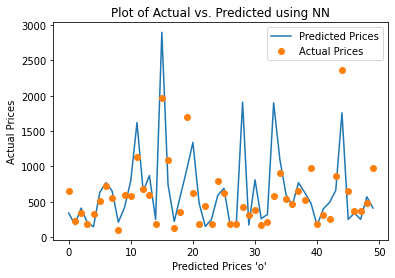

In [ ]:
import matplotlib.pyplot as plt
plt.title("Plot of Actual vs. Predicted using NN")
plt.plot(y_test)
plt.plot(y_pred, 'o')
plt.xlabel("Predicted Prices 'o' ")
plt.ylabel("Actual Prices")
plt.legend(['Predicted Prices', 'Actual Prices'], loc=0)
plt.show()


7/7 [==============================] - 0s 1ms/step - loss: 264642.2188


ValueError: ignored

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:

import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
df1 = pd.read_excel("te1.xlsx", header=0)
dt = df1.values
# split into input (X) and output (Y) variables
X = test.iloc[:, :-1].values
y = test.iloc[:, -1].values

In [ ]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
def evaluate(self, inputs, outputs):
        keras.backend.clear_session()

        X = Input(self.X_train[0].shape)
        co.forward({inputs['in']: X})
        logits = outputs['out'].val
        probs = Activation('softmax')(logits)

        model = Model(inputs=[inputs['in'].val], outputs=[probs])
        model.compile(optimizer=Adam(lr=self.learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
        model.summary()
        history = model.fit(self.X_train,
                            self.y_train,
                            batch_size=self.batch_size,
                            epochs=self.num_training_epochs,
                            validation_data=(self.X_val, self.y_val))
        results = {'validation_accuracy': history.history['val_accuracy'][-1]}
        return results 

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# prepare sequence
df1 = pd.read_excel("te1.xlsx", header=0)
dt = df1.values
# split into input (X) and output (Y) variables
X = test.iloc[:, :-1].values
y = test.iloc[:, -1].values

# create model
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
# train model
history = model.fit(X, y, epochs=500, batch_size=len(X), verbose=2)
# plot metrics
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

Epoch 1/500


ValueError: ignored

In [ ]:
r2_score(y_test, y_pred)

0.5899667070801844